# Tarea 1

# Pregunta 1

### Pregunta 1.1

Para esta tarea se eligió a $\textbf{Argentina, Bolivia, Chile y Perú}$. La razón principal fue que son países vecinos y de cultura similar.

# Argentina

El sistem de de Salud Argentino se fragmenta en, Público, de la Seguridad Social y Privado.

- Según un informe de 2017, Argentina cuenta con 17.845 establecimientos asistenciales en total.
- Cuenta con 19,3 respiradores artificiales por cada 100 mil habitantes.
-  4.5 Camas cada 1000 habitantesPerú 1.5, Chile 2)

Medidas Sanitarias más importantes tomadas por Argentina:
1. 06/03/2020. $\textbf{Segundo caso confirmado de COVID19}$
1. 16/03/2020. Cierre de Fronteras
2. 18/03/2020. Construcción de 12 Hospitales Modulares de Emergencia
3. 19/03/2020. Aislamiento social, preventivo y obligatorio para toda la población
4. 31/03/2020. Prórroga del aislamiento social, preventivo y obligatorio(hasta 12/04)
5. 01/04/2020. Prórroga del cierre de fronteras, de la asistencia a argentinos en el exterior y repatriación paulatina+
6. 26/04/2020. Prórroga del cierre de fronteras(hasta 10 de mayo)
7. 10/05/2020. Prórroga del aislamiento hasta el 24 de mayo inclusive y nuevas excepciones


# Bolivia

#### - Hasta el año 2019 contaba con 3253 centros de salud(hospitales 1r,2do,3r orden).
- Cuenta con 1.28 camas cada 100 mil habitantes.
- Cuenta con 1.61 médicos cada 100 mil habitantes.

Medidas tomadas por Bolivia:
- 11/03/20. $\textbf{Segundo caso confirmado de COVID19}$
- 13/03/20. Suspención de labores educativos y vuelos desde y hacia Europa
- 21/03/20. Se declara cuarentena total por 14 días
- 25/03/20. Se declara estado de emergencia 
- 14/04/20. Se extiende cuarentena total hasta 31/04
- 29/04/20. Se extiende cuarentena total hasta 11/05
- 11/05/20. Comienzan a regir cuarentenas dinámicas

Referencias: 
- https://es.wikipedia.org/wiki/Sistema_de_Salud_de_Bolivia#Hospitales
- https://www.sac.org.ar/wp-content/uploads/2018/04/el-sistema-de-salud-argentino.pdf
- https://es.wikipedia.org/wiki/Cuarentena_de_Bolivia_de_2020

## Pregunta 1.2

Importamos las librerías a utilizar

In [68]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(gridExtra)

Definimos las variables de población para cada uno de los países escogidos

In [69]:
pob_chi <- 18730000
pob_chi_minsal <- 19458310
pob_arg <- 44490000
pob_bol <- 11350000
pob_per <- 31990000

Leemos los datos de contagiados, fallecidos y recuperados

In [70]:
df_covid_time <- read.csv("time_series_covid19_confirmed_global.csv",sep=",",check.names=FALSE)
df_covid_deaths <- read.csv("time_series_covid19_deaths_global.csv",sep=",",check.names=FALSE)
df_covid_recovered <- read.csv("time_series_covid19_recovered_global.csv",sep=",",check.names=FALSE)

In [71]:
head(df_covid_time,n=5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,784,840,906,933,996,1026,1092,1176,1279,1351
2,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,494,518,539,548,562,584,609,634,663,678
3,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
4,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,673,673,696,704,713,717,717,723,723,731
5,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,24,24,24,24,25,25,25


Seleccionamos la información de los países a estudiar

In [72]:
df_chi <- df_covid_time[df_covid_time$"Country/Region"=='Chile',]
df_chi_deaths <- df_covid_deaths[df_covid_deaths$"Country/Region"=='Chile',]
df_chi_recovered <- df_covid_recovered[df_covid_recovered$"Country/Region"=='Chile',]

df_arg <- df_covid_time[df_covid_time$"Country/Region"=='Argentina',]
df_arg_deaths <-df_covid_deaths[df_covid_deaths$"Country/Region"=='Argentina',]
df_arg_recovered <-df_covid_recovered[df_covid_recovered$"Country/Region"=='Argentina',]

df_bol <- df_covid_time[df_covid_time$"Country/Region"=='Bolivia',]
df_bol_deaths <-df_covid_deaths[df_covid_deaths$"Country/Region"=='Bolivia',]
df_bol_recovered <-df_covid_recovered[df_covid_recovered$"Country/Region"=='Bolivia',]

df_per <- df_covid_time[df_covid_time$"Country/Region"=='Peru',]
df_per_deaths <-df_covid_deaths[df_covid_deaths$"Country/Region"=='Peru',]
df_per_recovered <-df_covid_recovered[df_covid_recovered$"Country/Region"=='Peru',]

Juntamos los países de interés en un sólo dataFrame

Definimos la función sort_df, que recibe como entrada el dataFrame de contagiados, fallecidos y recuperados, y elimina las columnas que no nos interesan y traspone los datos, para que queden en forma vertical, con las columnas, fecha, muertos y recuperados

In [73]:
sort_df <- function(df_c,df_d,df_r){
    df_c <-select(df_c, -c("Province/State","Lat","Long"))
    df_d <- select(df_d, -c("Province/State","Lat","Long"))
    df_r <-select(df_r, -c("Province/State","Lat","Long"))
    colnames(df_c)[1]<- 'Pais'
    colnames(df_d)[1]<- 'Pais'
    colnames(df_r)[1]<- 'Pais'
    df_c <- gather(df_c,c(2:ncol(df_c)),key='Fecha',value='Casos')
    df_d <- gather(df_d,c(2:ncol(df_d)),key='Fecha',value='Muertos')
    df_r <- gather(df_r,c(2:ncol(df_r)),key='Fecha',value='Recuperados')
    
    return(cbind(df_c,df_d[3],df_r[3]))
}

Definimos la función add_nc, que recibe como entrada un dataFrame ordenado y retorna un vector con los ''Nuevos casos por día''

In [74]:
add_nc <- function(df){
    new_cases <- rep(0,length(df$Casos))
    for(i in c(2:length(df$Casos))){
        new_cases[i] <- df$Casos[i]-df$Casos[i-1]
        }
    return(new_cases)
    }

Definimos la función add_params que recibe como entrada un dataFrame ordenado de un ciertos país y su polación, esta me selecciona los datos desde el segundo contagiado y agrega la columna con la tasa de incidencia acumulada, la tasa de incidencia por día, agregamos la columna de ''Casos nuevos por dia'' y la tasa de mortalidad acumulada.

In [75]:
add_params <- function(df,pob){
    #Consideramos desde el 2do caso en adelante
    df <- df[df$Casos>=2,]
    df <- cbind(c(1:nrow(df)),df)
    colnames(df)[1] <- 'Dias'
    df$"Casos_Nuevos" <- add_nc(df)
    #Agregamos la tasa de incidencia
    df$"Tasa_Incidencia" <- df$Casos*(100000/pob)
    df$"Tasa_Incidencia_dia" <- df$Casos_Nuevos*(100000/pob)
    df$"Tasa_Mortalidad" <- df$Muertos*(100000/pob)
    #Convertimos la fecha a Date, para trabajarla de mejor manera
    df$Fecha <- as.Date(df$Fecha, format = "%m/%d/%y")
    
    return(df)
}

Aplicamos las funciones definidas a nuestros datos, para obtener dataFrames ordenados, con los datos que necesitamos

In [76]:
df_chi <- sort_df(df_chi,df_chi_deaths,df_chi_recovered)
df_chi <- add_params(df_chi,pob_chi)

df_arg <- sort_df(df_arg,df_arg_deaths,df_arg_recovered)
df_arg <- add_params(df_arg,pob_arg)

df_bol <- sort_df(df_bol,df_bol_deaths,df_bol_recovered)
df_bol <- add_params(df_bol,pob_bol)

df_per <- sort_df(df_per,df_per_deaths,df_per_recovered)
df_per <- add_params(df_per,pob_per)

Unimos los dataFrames de los 4 paises 

In [77]:
df_final <- rbind(df_chi,df_arg,df_bol,df_per)
df_final <- df_final[order(df_final$Dias),]
head(df_final,n=5)

,Dias,Pais,Fecha,Casos,Muertos,Recuperados,Casos_Nuevos,Tasa_Incidencia,Tasa_Incidencia_dia,Tasa_Mortalidad
,<int>,<fct>,<date>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
44,1,Chile,2020-03-05,4,0,0,0,0.021356113,0,0
451,1,Argentina,2020-03-06,2,0,0,0,0.004495392,0,0
502,1,Bolivia,2020-03-11,2,0,0,0,0.017621145,0,0
472,1,Peru,2020-03-08,6,0,0,0,0.018755861,0,0
45,2,Chile,2020-03-06,4,0,0,0,0.021356113,0,0


Ya que tenemos un dataFrame con los datos de contiago de los 4 paises seleccionados desde el 2do caso, graficamos la evolución de los casos en función del tiempo, desde el día del segundo caso de cada país

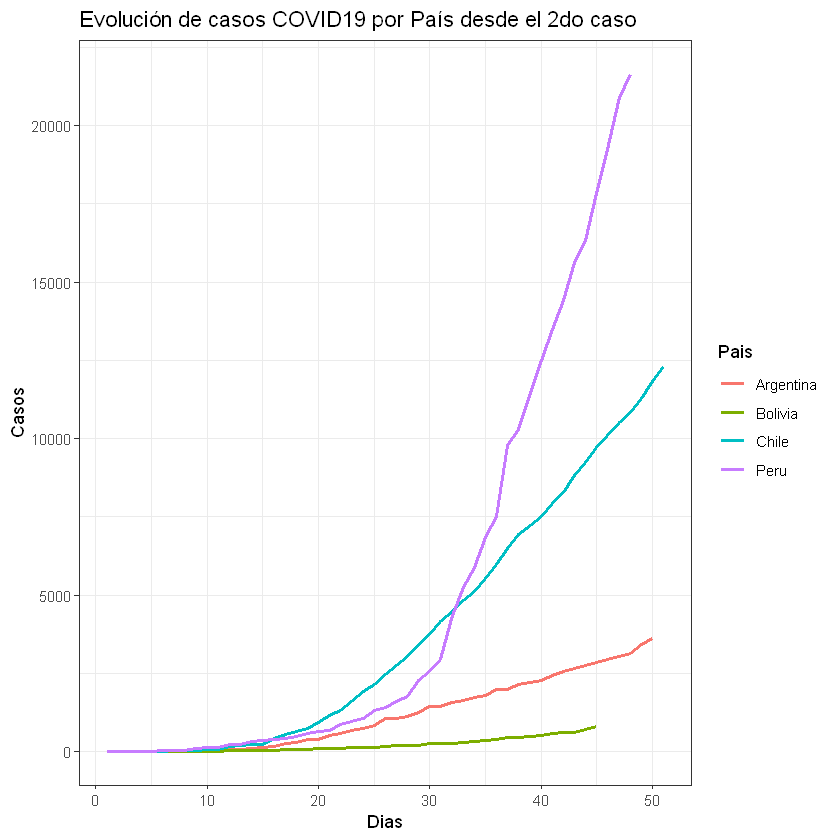

In [78]:
graph1 <- ggplot(df_final) + geom_line(aes(x = Dias, y = Casos, col = Pais), size=1, alpha = 1) + ggtitle("Evolución de casos COVID19 por País desde el 2do caso") + theme_bw()


graph1

In [79]:
# graph1 <- ggplot(df_final) + geom_line(aes(x = Dias, y = Casos, col = Pais),size=1, alpha = 1) + 
#                                                                                     ggtitle("Evolución de casos COVID19 desde el 2do caso") + theme_bw()
# graph2 <- ggplot(df_final) + geom_line(aes(x= Dias, y = Tasa_Incidencia, col = Pais),size = 1, alpha = 1) + 
#                                                                                     ggtitle("Tasa de Incidencia") + theme_bw()
# ggsave(plot = graph1, width = w*7, height = 8, dpi = 300, filename = "graph.pdf")
# ggsave(plot = graph2, width = w*7, height = 8, dpi = 300, filename = "incidencia.pdf")

In [80]:
# grid.arrange(graph1,graph2,nrow=2)

## Pregunta 1.3

La tasa de incidencia se define como el número de casos nuevos de una enfermedad u otra condición de salud dividido por la población en riesgo de la enfermedad (población expuesta) en un lugar específico y durante un período especifico. 

$\textbf{Interpretación epidemiológica:}$ Esta tasa permite calcular la probabilidad de que haya un cambio de estado(i.e. de no tener la enfermedad a enfermarse) es un intervalo determinado. En términos epidemiológicos, esto se denomina ''riesgo''. El riesgo es, la probabilidad de cambio de estado en una población de interés y en un intervalo dado. 

La tasa de incidencia se calcula como: 

\begin{equation*}
    TI = \frac{\mbox{# Casos confirmados País}}{\mbox{Población País}}\cdot 100.000
\end{equation*}

Calculamos la Tasa de Incidencia acumulada hasta el último periodo, es decir, lo casos confirmados hasta el último dato de nuestro dataFrame por país

Rescatamos el último dato de contagiados por país

In [81]:
#Tomamos el último valor de nuestros df
acum_chi <- tail(df_chi$Casos, n=1) 
acum_arg <- tail(df_arg$Casos, n=1) 
acum_bol <- tail(df_bol$Casos, n=1)
acum_per <- tail(df_per$Casos, n=1)

Calculamos las tasas de Incidencia

In [82]:
ti_chi <- (acum_chi/pob_chi)*100000
ti_arg <- (acum_arg/pob_arg)*100000
ti_bol <- (acum_bol/pob_bol)*100000
ti_per <- (acum_per/pob_per)*100000

print(paste('Tasa de incidencia Chile: ',ti_chi))
print(paste('Tasa de incidencia Argentina: ',ti_arg))
print(paste('Tasa de incidencia Bolivia: ',ti_bol))
print(paste('Tasa de incidencia Peru: ',ti_per))

[1] "Tasa de incidencia Chile:  65.7020822210358"
[1] "Tasa de incidencia Argentina:  8.10743987412902"
[1] "Tasa de incidencia Bolivia:  7.11013215859031"
[1] "Tasa de incidencia Peru:  67.6711472335105"


## Conclusiones

## Pregunta 1.4

Escogemos un periodo de tiempo de 2 semanas desde que se reportaron 200 casos

Creamos la siguiente función, que agrega una columna con la tasa de contagio a un cierto dataFrame

In [83]:
add_tc <- function(df,pob){
    #Agregamos la tasa de contagio al data frame
    df$"Tasa_Contagio" <- df$Casos-df$Muertos-df$Recuperados*(100000/pob)
    return(df)
}

Creamos una función, que recibe como parametros, el numero de contagios mínimos, el numero de semanas posterior a este ''n'' de contagios y el data frame. Esta función nos permite ''recortar'' nuestro data frame

In [84]:
week <- function(n,w,df){
    df <- df[df$Casos>n,]
    df <- df[df$Fecha>=df$Fecha[1] & df$Fecha<(df$Fecha+(w*7))[1],]
    return(df)
}

Para este caso consideraremos $w=2$ semanas desde que ocurren $n=200$ contagios

In [85]:
n = 200
w = 2

Aplicamos las funciones para los dataFrames de los países

In [86]:
df_chi2 <- week(n,w,df_chi) #Filtramos el df a w semanas desde que se producen n casos
df_chi2 <- add_tc(df_chi2,pob_chi) #Agregmaos la tasa de contagio en el periodo mencionado
df_chi2$Dias <- c(1:nrow(df_chi2)) #Agregamos una nueva columna con la tasa de contagio

df_arg2 <- week(n,w,df_arg) 
df_arg2 <- add_tc(df_arg2,pob_arg)
df_arg2$Dias <- c(1:nrow(df_arg2))

df_bol2 <- week(n,w,df_bol) 
df_bol2 <- add_tc(df_bol2,pob_bol)
df_bol2$Dias <- c(1:nrow(df_bol2))

df_per2 <- week(n,w,df_per) 
df_per2 <- add_tc(df_per2,pob_per)
df_per2$Dias <- c(1:nrow(df_per2))

Unimos todos los data frames

In [87]:
df_final2 <- rbind(df_chi2,df_arg2,df_bol2,df_per2)
df_final2 <- df_final2[order(df_final2$Dias),]

In [88]:
head(df_final2,n=5)

,Dias,Pais,Fecha,Casos,Muertos,Recuperados,Casos_Nuevos,Tasa_Incidencia,Tasa_Incidencia_dia,Tasa_Mortalidad,Tasa_Contagio
,<int>,<fct>,<date>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,1,Chile,2020-03-17,201,0,0,46,1.0731447,0.2455953,0.000000000,201.0000
611,1,Argentina,2020-03-22,266,4,3,108,0.5978872,0.2427512,0.008990784,261.9933
78,1,Bolivia,2020-04-08,210,15,2,16,1.8502203,0.1409692,0.132158590,194.9824
581,1,Peru,2020-03-19,234,0,1,89,0.7314786,0.2782119,0.000000000,233.9969
57,2,Chile,2020-03-18,238,0,0,37,1.2706887,0.1975440,0.000000000,238.0000


In [89]:
graph2 <- ggplot(df_final2) + geom_line(aes(x = Dias, y = Tasa_Contagio, col = Pais), size=1, alpha = 1) + 
                                                                                    ggtitle("Tasa de contagio acumulada desde que se superan 200 confirmados") + theme_bw()
ggsave(plot = graph2, width = w*7, height = 8, dpi = 300, filename = "graph3.pdf")


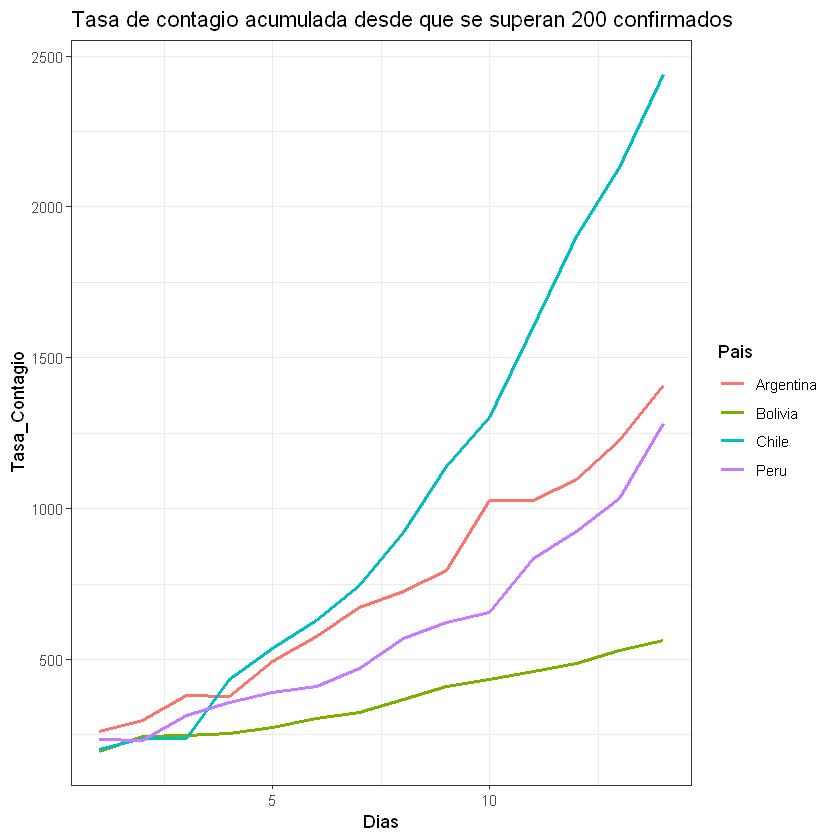

In [90]:
graph2

## Calcularemos el intervalo de confianza de la tasa de contagio como:

\begin{equation*}
    (\hat{p}-z_{\alpha/2}\sqrt{\frac{\hat{p}(100.000-\hat{p})}{n}} , \hat{p}+z_{\alpha/2}\sqrt{\frac{\hat{p}(100.000-\hat{p})}{n}})
\end{equation*}

Donde,

\begin{equation*}
    \hat{p} = \frac{\# Contagiados - \# Fallecidos - \# Recuperados}{Población}\cdot100.000 = \mbox{Tasa de Contagio}
\end{equation*}

y $n$ es la población de cada país.

Calculamos el número de contagios, fallecidos y recuperados para cada país en el intervalo de tiempo de dos semanas luego que cada país alcanza los 200 contagios confirmados

In [91]:
n_cont_chi <- sum(df_chi2$Casos_Nuevos)
n_fall_chi <- tail(df_chi2$Muertos, n=1) - df_chi2$Muertos[1]
n_rec_chi <- tail(df_chi2$Recuperados, n=1) - df_chi2$Recuperados[1]

n_cont_arg <- sum(df_arg2$Casos_Nuevos)
n_fall_arg <- tail(df_arg2$Muertos, n=1) - df_arg2$Muertos[1]
n_rec_arg <- tail(df_arg2$Recuperados, n=1) - df_arg2$Recuperados[1]

n_cont_bol <- sum(df_bol2$Casos_Nuevos)
n_fall_bol <- tail(df_bol2$Muertos, n=1) - df_bol2$Muertos[1]
n_rec_bol <- tail(df_bol2$Recuperados, n=1) - df_bol2$Recuperados[1]

n_cont_per <- sum(df_per2$Casos_Nuevos)
n_fall_per <- tail(df_per2$Muertos, n=1) - df_per2$Muertos[1]
n_rec_per <- tail(df_per2$Recuperados, n=1) - df_per2$Recuperados[1]

Obtenemos la tasa de contagio por país, que corresponde efectivamente a la proporción de casos activos por cada 100.000 habitantes

In [92]:
tc_chi <- (n_cont_chi-n_fall_chi-n_rec_chi)/(pob_chi)*100000
tc_arg <- (n_cont_arg-n_fall_arg-n_rec_arg)/(pob_arg)*100000
tc_bol <- (n_cont_bol-n_fall_bol-n_rec_bol)/(pob_bol)*100000
tc_per <- (n_cont_per-n_fall_per-n_rec_per)/(pob_per)*100000

print(paste('Tasa contagio Chile:',tc_chi))
print(paste('Tasa contagio Argentina:',tc_arg))
print(paste('Tasa contagio Bolivia:',tc_bol))
print(paste('Tasa contagio Peru:',tc_per))

[1] "Tasa contagio Chile: 11.3721302722904"
[1] "Tasa contagio Argentina: 2.19824679703304"
[1] "Tasa contagio Bolivia: 3.08370044052863"
[1] "Tasa contagio Peru: 2.33510472022507"


Utilizaremos un $\alpha = 0.05$, donde $z_{\alpha/2}$ = 1.959964

In [93]:
z_alpha2 <- qnorm(1- 0.05/2)
print(z_alpha2)

[1] 1.959964


In [94]:
int_chi <- c(tc_chi-z_alpha2*sqrt((tc_chi*(100000-tc_chi))/pob_chi), tc_chi+z_alpha2*sqrt((tc_chi*(100000-tc_chi))/pob_chi))
int_arg <- c(tc_arg-z_alpha2*sqrt((tc_arg*(100000-tc_arg))/pob_arg), tc_arg+z_alpha2*sqrt((tc_arg*(100000-tc_arg))/pob_arg))
int_bol <- c(tc_bol-z_alpha2*sqrt((tc_bol*(100000-tc_bol))/pob_bol), tc_bol+z_alpha2*sqrt((tc_bol*(100000-tc_bol))/pob_bol))
int_per <- c(tc_per-z_alpha2*sqrt((tc_per*(100000-tc_per))/pob_per), tc_per+z_alpha2*sqrt((tc_per*(100000-tc_per))/pob_per))


print(paste('Intervalo de Confianza de Tasa de Contagio para Argentina:',int_arg[1],int_arg[2]))
print(paste('Intervalo de Confianza de Tasa de Contagio para Bolivia:',int_bol[1],int_bol[2]))
print(paste('Intervalo de Confianza de Tasa de Contagio para Peru:',int_per[1],int_per[2]))


[1] "Intervalo de Confianza de Tasa de Contagio para Argentina: 2.06047816720189 2.33601542686419"
[1] "Intervalo de Confianza de Tasa de Contagio para Bolivia: 2.76064314326449 3.40675773779278"
[1] "Intervalo de Confianza de Tasa de Contagio para Peru: 2.167653205209 2.50255623524114"


# Pregunta 2

### Pregunta 2.1

Realizaremos dos test de diferencia de medias comparando la tasa de incidencia diaria. Para esto, compararemos Chile - Peru y Argentina- Bolivia, y realizaremos un test de hipótesis al 95% de confianza para ver si existe diferencia estadísticamente significativa entre la media de Tasa de Incidencia Acumulada de ambos pares de paises.

 * _Para realizar estos test trabajaremos bajo el supuesto de que la Tasa de Incidencia acumulada se distribuye de forma Normal_


Hacemos un diagrama de caja para visualizar los datos a estudiar en el test de diferencia de medias

### Test 1: Chile - Peru.  Realizaremos el siguiente test.

$$H_{0}: \bar{X}_{Chi} = \bar{X}_{Per}\\
  H_{A}: \bar{X}_{Chi} \neq \bar{X}_{Per}$$

Hacemos un diagrama de caja para visualizar los datos a estudiar en el test de diferencia de medias

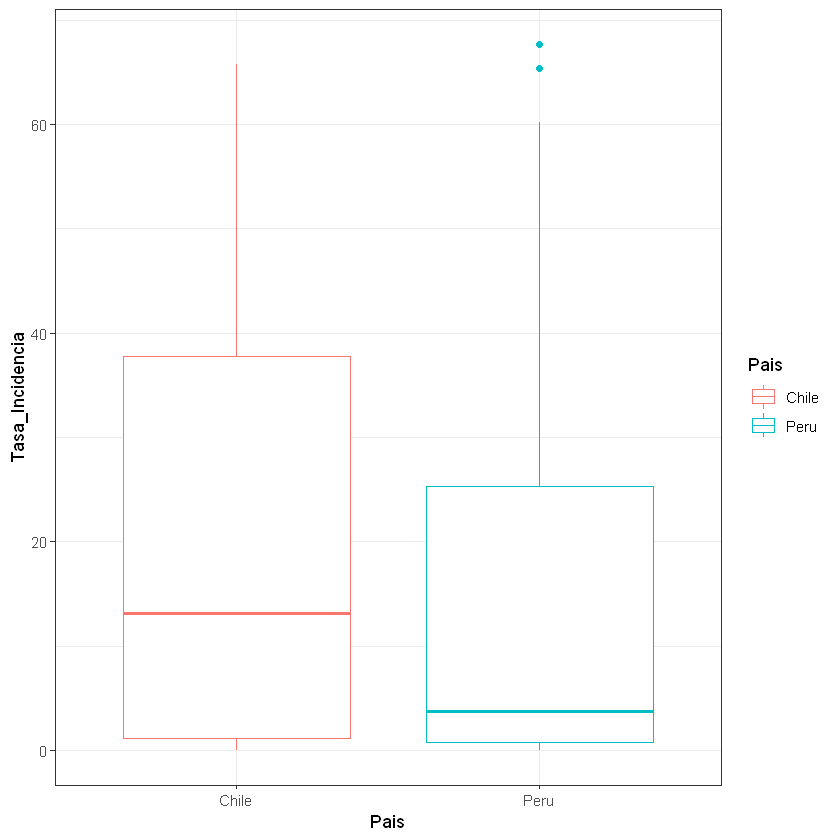

In [95]:
ggplot(data = df_final[df_final$Pais == "Chile" | df_final$Pais=='Peru',], aes(x= Pais, y= Tasa_Incidencia, color = Pais)) + 
  geom_boxplot() +
  theme_bw()

Utilizando la funcion t.test efectuamos el test de diferencia de medias.


In [96]:
t.test(x = df_final[df_final$Pais == "Peru",]$Tasa_Incidencia,
       y = df_final[df_final$Pais == "Chile", ]$Tasa_Incidencia,
       alternative = "two.sided", mu = 0, var.equal = TRUE, conf.level = 0.95 )


	Two Sample t-test

data:  df_final[df_final$Pais == "Peru", ]$Tasa_Incidencia and df_final[df_final$Pais == "Chile", ]$Tasa_Incidencia
t = -1.2584, df = 97, p-value = 0.2113
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.681139   3.063989
sample estimates:
mean of x mean of y 
 15.30426  20.61284 


Con los valores obtenidos podemos concluir segun los 3 principios:

1. Podemos ver que el valor del estadistico en valor absouto es t = 1.2584, como tenemos un n grande (df = 97) podemos contrastar nuestro estadístico contra el valor de una N(0,1). Para un α=0.05, tenemos que:

In [97]:
alpha = 0.05
t_alpha = qnorm(1-alpha/2) #Como es un test de dos colas dividimos alpha en dos
print(t_alpha)

[1] 1.959964


Luego, observamos que $t<t_{alpha}$, es decir, 1.2584<1.96. Por lo cual, NO rechazamos la hipótesis nula de que la media de la tasa de incidencia diaria en Chile es igual a la tasa de incidencia diaria en Peru.

2. Si analizamos el intervalo de confianza notamos que con un 95% de confianza podemos decir que la diferencia en la media de la tasa de incidencia diaria entre Chile y Peru se mueve en el rango de $[-13.681139,3.063989]$. Como este intervalo SI contiene al 0, entonces podemos afirmar que NO se rechaza la hipótesis nula.

3. Finalmente si analizamos a traves de P-valor podemos notar que el obtenido $p−value=0.2113>α$ entonces a traves de este metodo tampoco podemos rechazar la hipótesis nula.

### Test 2: Argentina - Bolivia. Realizaremos el siguiente test.

$$H_{0}: \bar{X}_{Arg} = \bar{X}_{Bol}\\
  H_{A}: \bar{X}_{Arg} \neq \bar{X}_{Bol}$$

Hacemos un diagrama de caja para visualizar los datos a estudiar en el test de diferencia de medias

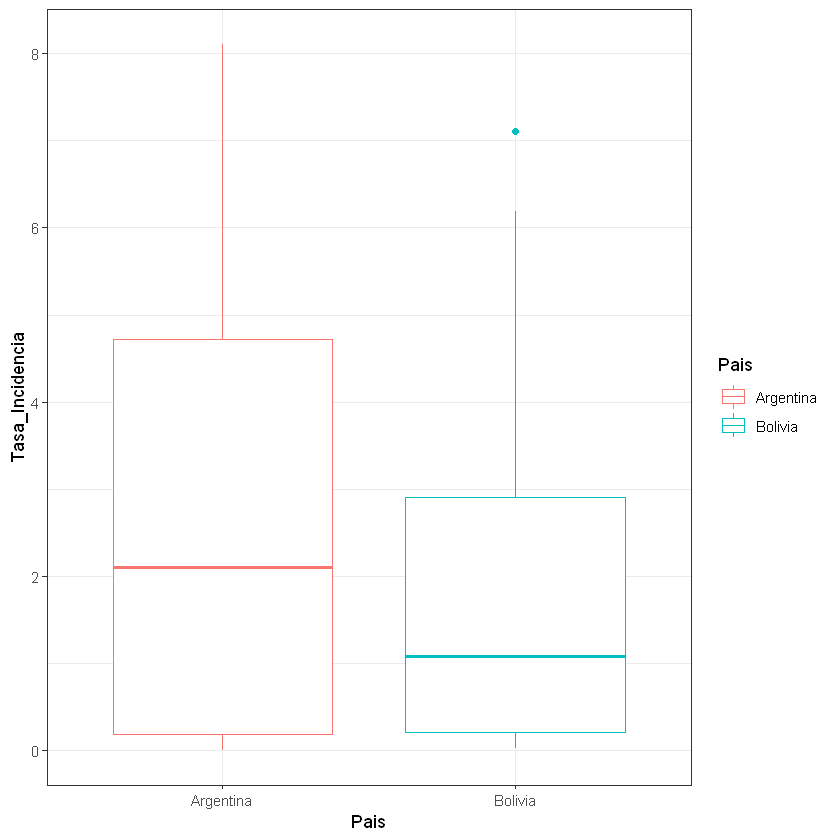

In [98]:
ggplot(data = df_final[df_final$Pais == "Argentina" | df_final$Pais=='Bolivia',], aes(x= Pais, y= Tasa_Incidencia, color = Pais)) + 
  geom_boxplot() +
  theme_bw()

Utilizamos la función t.test

In [99]:
t.test(x = df_final[df_final$Pais == "Argentina",]$Tasa_Incidencia,
       y = df_final[df_final$Pais == "Bolivia", ]$Tasa_Incidencia,
       alternative = "two.sided", mu = 0, var.equal = TRUE, conf.level = 0.95)


	Two Sample t-test

data:  df_final[df_final$Pais == "Argentina", ]$Tasa_Incidencia and df_final[df_final$Pais == "Bolivia", ]$Tasa_Incidencia
t = 1.8235, df = 93, p-value = 0.07143
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07592812  1.78255710
sample estimates:
mean of x mean of y 
 2.678669  1.825355 


Con los valores obtenidos podemos concluir segun los 3 principios:

1. Podemos ver que el valor del estadistico en valor absouto es t = 1.8235, como tenemos un n grande (df = 95) podemos contrastar nuestro estadístico contra el valor de una N(0,1). Para un α=0.05, tenemos que:

In [100]:
alpha = 0.05
t_alpha = qnorm(1-alpha/2) #Como es un test de dos colas dividimos alpha en dos
print(t_alpha)

[1] 1.959964


Luego, observamos que $t<t_{alpha}$, es decir, 1.8235<1.96. Por lo cual, NO rechazamos la hipótesis nula de que la media de la tasa de incidencia diaria en Argentina es igual a la tasa de incidencia diaria en Bolivia.

2. Si analizamos el intervalo de confianza notamos que con un 95% de confianza podemos decir que la diferencia en la media de la tasa de incidencia diaria entre Chile y Peru se mueve en el rango de $[-0.07592812 ,1.78255710]$. Como este intervalo SI contiene al 0, entonces podemos afirmar que NO se rechaza la hipótesis nula.

3. Finalmente si analizamos a traves de P-valor podemos notar que el obtenido $p−value=0.07143>α$ entonces a traves de este metodo tampoco podemos rechazar la hipótesis nula.

### Conclusiones

Como conclusion de ambos test de hipoteis se puede afirmar que la diferencia entre las medias de las tasas de incidencia acumulada entre Chile - Peru y Argentina - Bolivia casi no existen, por lo que se concluye que con un 95% de confianza las medias de las tasas de incidencia acumulada entre Chile y Peru son iguales, de la misma forma en que ocurre entre Argentina y Bolivia.

En otras palabras, no existe evidencia estadística significativa que nos permitan rechazar la hipótesis nula de ambos test.

In [101]:
shapiro.test(df_per$Tasa_Incidencia)


	Shapiro-Wilk normality test

data:  df_per$Tasa_Incidencia
W = 0.74812, p-value = 1.046e-07


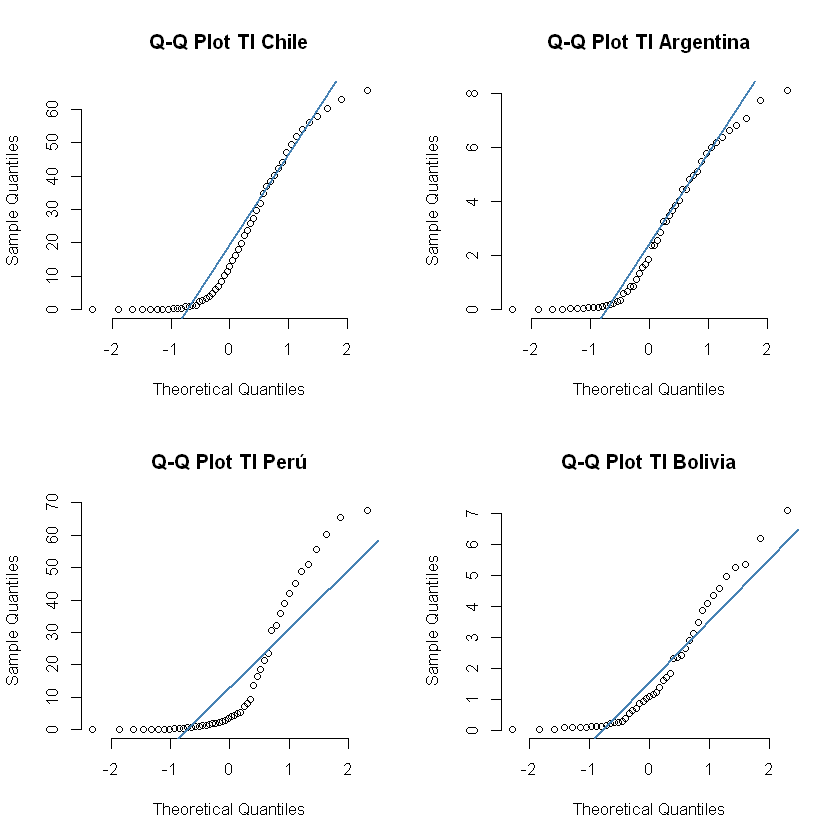

In [102]:
par(mfcol=c(2,2))
qqnorm(df_chi$Tasa_Incidencia, pch = 1 , frame = FALSE,main='Q-Q Plot TI Chile') 
qqline(df_chi$Tasa_Incidencia, col = "steelblue", lwd = 2)

qqnorm(df_per$Tasa_Incidencia, pch = 1 , frame = FALSE,main='Q-Q Plot TI Perú')
qqline(df_per$Tasa_Incidencia, col = "steelblue", lwd = 2)

qqnorm(df_arg$Tasa_Incidencia, pch = 1 , frame = FALSE,main='Q-Q Plot TI Argentina')
qqline(df_arg$Tasa_Incidencia, col = "steelblue", lwd = 2)

qqnorm(df_bol$Tasa_Incidencia, pch = 1 , frame = FALSE,main='Q-Q Plot TI Bolivia')
qqline(df_bol$Tasa_Incidencia, col = "steelblue", lwd = 2)

ggsave(plot = last_plot(), width = w*7, height = 8, dpi = 300, filename = "qqplots.pdf")

Anteriormente, para poder realizar los test de hipótesis hicimos el supuesto de que mi variable, en este caso la tasa de incidencia acumulada se comportaba de forma normal.

Podemos observar en los QQ-plots que las variables utilizadas anteriormente no tienden a comportarse como una normal, ya que los puntos no se ajustan a la recta teórica de distribución normal, desde la perspectiva de los cuartiles. Por lo tanto las conclusiones obtenidas bajo los test de hipótesis están sesgadas bajo esta información adicional, ya que, efectivamente no existe un comportamiento normal de parte de la variable. De igual forma, para estar más seguro de esto se podrían aplicar test de normalidad a la tasa de indiencia acumulada para comprobar más en profunidad las conclusiones.

### Pregunta 2.2

### Test de diferencia de proporciones

Buscamos realizar dos test de diferencia de proporciones para la tasa de mortalidad entre Chile-Peru y Argentina-Bolivia a un nivel de significancia del 95%. Para ello definiremos primero la tasa de mortalidad acumulada como el cociente entre fallecidos y poblacion total por cada 100.000 habitantes, la cual se encuentra en su forma acumulada en la ultima columna de nuestro Data frame.

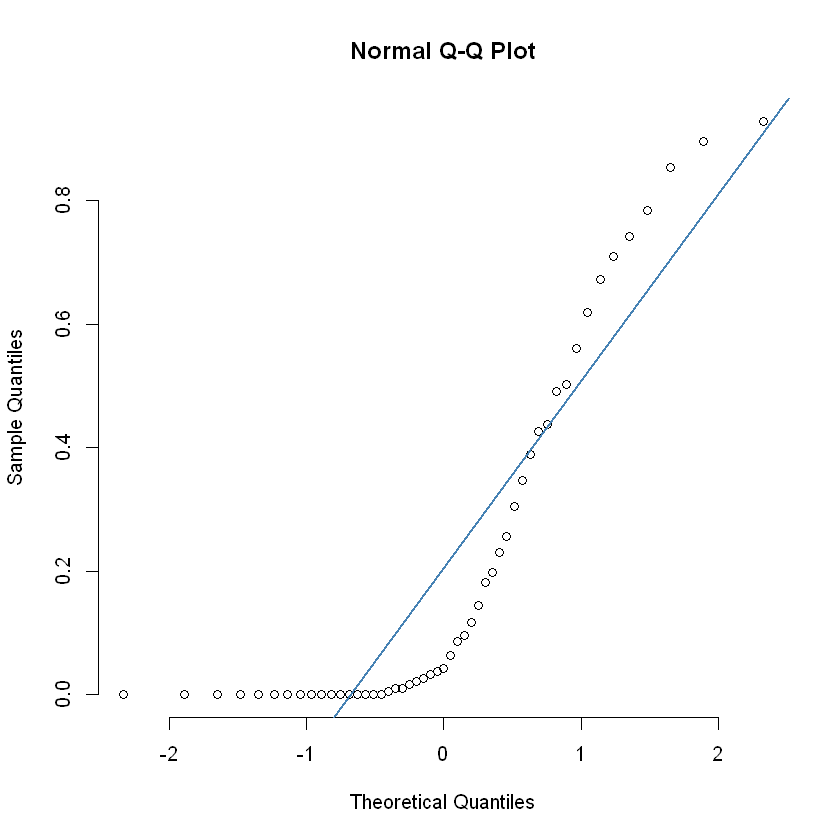

In [103]:
qqnorm(df_chi$Tasa_Mortalidad, pch = 1 , frame = FALSE)
qqline(df_chi$Tasa_Mortalidad, col = "steelblue", lwd = 2)

Calculamos la media y la desviación estándar de la tasa de mortalidad acumulada por cada país

In [104]:
df_final %>% 
  group_by(Pais) %>% 
  summarize(mean_mortalidad= mean(Tasa_Mortalidad),
            std_mortalidad = sd(Tasa_Mortalidad))

Pais,mean_mortalidad,std_mortalidad
<fct>,<dbl>,<dbl>
Argentina,0.1091032,0.1219487
Bolivia,0.1121880,0.1248606
Chile,0.2204705,0.2906321
Peru,0.3998645,0.5475851


### Test 1: Chile - Perú

Para el test de proporciones de Chile y Perú, vamos a comparar la tasa de mortalidad cada 100.000 habitantes, que es equivalente, a la proporción de fallecidos sobre la población cada 100.000 habitantes.

Trabajamos con la tasa de mortalidad por país

In [105]:
m_chi <-  df_chi$Tasa_Mortalidad
m_per <-  df_per$Tasa_Mortalidad

n_chi <- length(m_chi)
n_per <- length(m_per)

print(paste("n Chile: ", n_chi))
print(paste("n Peru: ", n_per))

[1] "n Chile:  51"
[1] "n Peru:  48"


## El test que realizaremos es el siguiente:


$$
\left\{
\begin{array}{ll}
H_{0}: &  p_{chi}=p_{per}\\
H_{A}: & p_{chi}\neq p_{per}
\end{array}
\right.
$$

El estadístico que necesitamos construir para el test es:
$$
Z = \frac{\hat{p}_{chi} - \hat{p}_{per}}{\sqrt{Var(\hat{p}_{chi} - \hat{p}_{per})}}
$$

Y bajo la hipótesis nula, la varianza de la diferencia de proporciones es:
$$
 Var(\hat{p}_{chi} - \hat{p}_{per})= \hat{p}_{chi}(100000-\hat{p}_{per})(\frac{1}{n_{chi}}+\frac{1}{n_{per}})
$$

Este resultavo los obtenemos bajo $H_{0}$, donde se supone que $\hat{p}_{chi}=\hat{p}_{per} = \hat{p}$, donde $\hat{p}$ lo estimamos como:

\begin{equation*}
    \hat{p} = 100.000 \cdot \frac{\hat{p}_{chi}+\hat{p}_{per}}{n_{chi}+n_{per}}
\end{equation*}

Obs: $\hat{P}_{per} = 1-\hat{P}_{chi}$, pero como estamos considerando la tasa de mortalidad cada 100.000 habitantes, se tiene $\hat{P}_{per} = 100000-\hat{P}_{chi}$

In [106]:
p_chi <- tail(df_chi$Tasa_Mortalidad,n=1)
n_chi <- pob_chi

p_per <- tail(df_per$Tasa_Mortalidad,n=1)
n_per <- pob_per

print(paste('P_chi: ',p_chi))
print(paste('P_per: ',p_per))

[1] "P_chi:  0.928990923651895"
[1] "P_per:  1.98186933416693"


* $\hat{P}_{chi}$ = 0.9282 fallecidos por 100.000 habitantes
* $\hat{P}_{per}$ = 1.98 fallecidos por 100.000 habitantes

Calculemos entonces $\hat{p}$ con los datos que poseemos:

In [107]:
p_hat <- 100000*((p_chi+p_per)/(n_chi+n_per))

Luego, la desviación estándar para el estadístico es:

In [108]:
SE_p <- sqrt(p_hat*(100000-p_hat)*((1/n_chi)+(1/n_per)))
print(paste("SE de p_hat: ", SE_p))

[1] "SE de p_hat:  0.00697003015703441"


Entonces, el valor de nuestro estadístico es de:

In [109]:
Z <- (p_chi-p_per)/SE_p
print(paste("Z : ", Z))

[1] "Z :  -151.05794190179"


In [110]:
print(paste('n_chi:',n_chi))
print(paste('n_per:',n_per))

[1] "n_chi: 18730000"
[1] "n_per: 31990000"


Como tenemos un n grande, dado que estamos considerando la población podemos contrastar nuestro estadístico contra el valor de una $\mathcal{N}$(0,1). Para un α=0.05, tenemos que:

In [111]:
alpha = 0.05
z_alpha = qnorm(1- alpha/2)
print(paste("Z_alpha :", z_alpha))

[1] "Z_alpha : 1.95996398454005"


Observamos que $|Z|>Z_{alpha}$ por lo cual existe evidencia estadística que permite rechazar la hipótesis nula de que la tasa de mortalidad sean iguales entre Chile y Perú.

### Test 2: Argentina - Bolivia

Vemos que la media de la Tasa de Mortalidad para Argentina es de $0.1091032(10,9\%)$ con una desviación estándar de $0.12$ y en el caso de Bolivia, su media de Tasa de Mortalidad es de $0.1121880(11,2\%)$ con una desviación estándar de $0.12$., Seleccionemos los datos solo de estos dos Paises para realizar el test.

$$
\left\{
\begin{array}{ll}
H_{0}: &  p_{arg}=p_{bol}\\
H_{A}: & p_{arg}\neq p_{bol}
\end{array}
\right.
$$

El estadístico que necesitamos construir para el test es:
$$
Z = \frac{\hat{p}_{arg} - \hat{p}_{bol}}{\sqrt{Var(\hat{p}_{arg} - \hat{p}_{bol})}}
$$

Y bajo la hipótesis nula, la varianza de la diferencia de proporciones es:
$$
 Var(\hat{p}_{arg} - \hat{p}_{bol})= \hat{p}_{arg}(100000-\hat{p}_{bol})(\frac{1}{n_{chi}}+\frac{1}{n_{bol}})
$$

Este resultavo los obtenemos bajo $H_{0}$, donde se supone que $\hat{p}_{arg}=\hat{p}_{bol} = \hat{p}$, donde $\hat{p}$ lo estimamos como:

\begin{equation*}
    \hat{p} = 100.000 \cdot \frac{\hat{p}_{arg}+\hat{p}_{bol}}{n_{arg}+n_{bol}}
\end{equation*}

Obs: $\hat{P}_{arg} = 1-\hat{P}_{bol}$, pero como estamos considerando la tasa de mortalidad cada 100.000 habitantes, se tiene $\hat{P}_{arg} = 100000-\hat{P}_{bol}$

In [112]:
p_arg <- tail(df_arg$Tasa_Mortalidad,n=1)
n_arg <- pob_arg

p_bol <- tail(df_bol$Tasa_Mortalidad,n=1)
n_bol <- pob_bol

print(paste('P_arg: ',p_arg))
print(paste('P_bol: ',p_bol))

[1] "P_arg:  0.395594515621488"
[1] "P_bol:  0.387665198237885"


* $\hat{P}_{arg}$ = 0.396 fallecidos por 100.000 habitantes
* $\hat{P}_{bol}$ = 0.388 fallecidos por 100.000 habitantes

Calculemos entonces $\hat{p}$ con los datos que poseemos:

In [113]:
p_hat2 <- 100000*((p_arg+p_bol)/(n_arg+n_bol))

print(paste('P_hat2: ',p_hat2))

[1] "P_hat2:  0.00140268573398885"


Luego, la desviación estándar para el estadístico es:

In [114]:
SE_p2 <- sqrt(p_hat2*(100000-p_hat2)*((1/n_arg) + (1/n_bol)))
print(paste("SE de p_hat: ", SE_p2))

[1] "SE de p_hat:  0.00393843568806076"


Entonces, el valor de nuestro estadístico es de:

In [115]:
Z2 <- (p_arg-p_bol)/SE_p2
print(paste("Z : ", Z2))

[1] "Z :  2.01331645649058"


In [116]:
print(paste('n_arg:',n_arg))
print(paste('n_bol:',n_bol))

[1] "n_arg: 44490000"
[1] "n_bol: 11350000"


Como tenemos un n grande, dado que estamos considerando la población podemos contrastar nuestro estadístico contra el valor de una $\mathcal{N}$(0,1). Para un α=0.05, tenemos que:

In [117]:
alpha = 0.05
z_alpha = qnorm(1 - alpha/2)
print(paste("Z_alpha :", z_alpha))

[1] "Z_alpha : 1.95996398454005"


Observamos que $Z>Z_{alpha}$, por lo cual existe evidencia estadística para rechazar la hipótesis nula de que la tasa de mortalidad entre Argentina y Bolivia sean iguales.

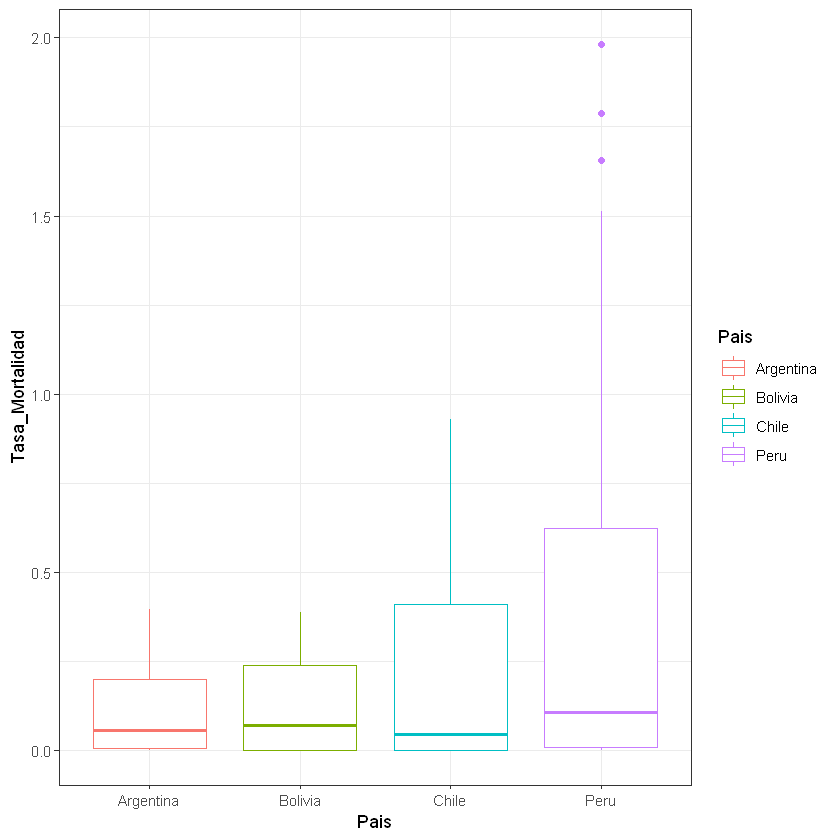

In [118]:
ggplot(data = df_final, aes(x= Pais, y= Tasa_Mortalidad, color = Pais))+ geom_boxplot()+ theme_bw()

### Test de ANOVA para la tasa de contagio

Realizaremos un test ANOVA de una via para comparar la media de la Tasa de Incidencia Acumulada de los 4 paises escogidos.

Para comenzar visualizemos los datos con un gráfico de boxplot ajustandolos a la misma cantidad de muestras por pais (45 muestras)


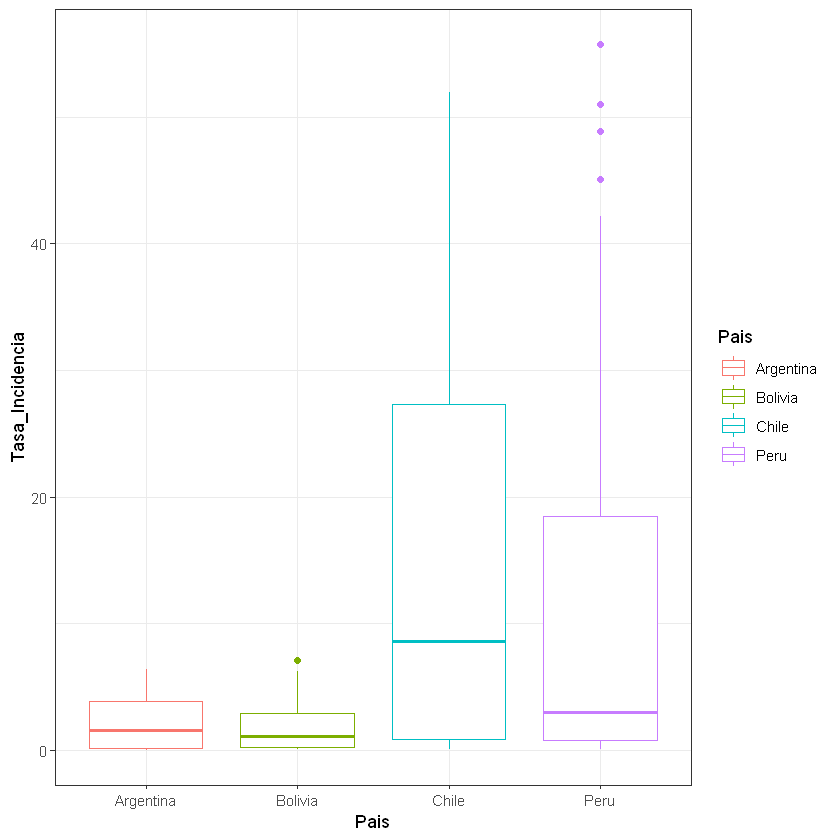

In [119]:
df_anova <- df_final[df_final$Dias < 46, ]
ggplot(data = df_anova, aes(x= Pais, y= Tasa_Incidencia, color = Pais)) + 
  geom_boxplot() +
  theme_bw()

Compararemos las medias de las Tasas de Incidencia acumuladas en estos 4 Paises. Por lo cual en este caso $I=4$. Y para cada categoría tenemos 45 observaciones. Entonces $J=45$. Recordemos que el modelo de ANOVA es el siguiente:
$$
Y_{ij}=μ+α_{i}+ϵ_{ij}
$$

Donde $Y_{ij}$ es la observación de la persona $j$ en el grupo $i$, $μ$ es la media poblacional de donde provienen todas las observaciones, $α_{i}$ es el efecto que existe por pertenecer al grupo $i$ y en $ϵ_{ij}$ dejamos todo aquello que no podemos observar, toda la variabilidad entre las observaciones que no es explicada por los factores de nuestro modelo (es un error aleatorio).

In [120]:
anova_df <- aov(df_anova$Tasa_Incidencia~df_anova$Pais)
summary(anova_df)

               Df Sum Sq Mean Sq F value   Pr(>F)    
df_anova$Pais   3   6458  2152.7    15.2 7.76e-09 ***
Residuals     176  24934   141.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

De lo anterior podemos extraer lo siguiente:

$>$El valor de SSB es 6458

$>$El estimador insesgado de la varianza intergrupo es 2152.7

$>$El valor de SSW es 24934

$>$El estimador insesgado de la varianza intragrupo es 141.7

Con estos valores, se construye el estadístico del test, el cual es:
$$
F=\frac{SSB/(I - 1)}{SSW/I(J-1)}=15.2
$$

Ademas, se nos entrega el p-valor del test de hipotesis, el cual es $7.76*10^{-9}$ valor que se aproxima a cero, por lo tanto a un nivel de significancia del $5\%$ se $rechaza$ la hipotesis nula del ANOVA, esto quiere decir que \textbf{AL MENOS UNA DE LAS MEDIAS} es distinta de las otras significativamente y por lo observado en el grafico de boxplot se puede deducir que al menos es la de Chile y potencialmente la de Peru tambien.

Para comprobar lo anterior, considerando ademas que la realizacion del test de diferencia de medias entre Argentina y Bolivia no fue rechazado ni tampoco el test entre Chile y Peru, realizaremos un test de diferencia de medias entre Bolivia y Chile y otro entre Peru y Argentina.

Test de diferencia de medias de la tasa de incidencia acumulada entre Bolivia y Chile:
$$H_{0}: \bar{X}_{Bol} = \bar{X}_{Chi}\\
  H_{A}: \bar{X}_{Bol} \neq \bar{X}_{Chi}$$

In [121]:
t.test(x = df_final[df_final$Pais == "Bolivia",]$Tasa_Incidencia,
       y = df_final[df_final$Pais == "Chile", ]$Tasa_Incidencia,
       alternative = "two.sided", mu = 0, var.equal = TRUE, conf.level = 0.95)


	Two Sample t-test

data:  df_final[df_final$Pais == "Bolivia", ]$Tasa_Incidencia and df_final[df_final$Pais == "Chile", ]$Tasa_Incidencia
t = -5.9008, df = 94, p-value = 5.684e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -25.10912 -12.46584
sample estimates:
mean of x mean of y 
 1.825355 20.612837 


Efectivamente como tenemos un $p-value<\alpha$ podemos rechazar la Hipótesis nula de que las medias de tasa de incidencia acumulada entre Bolivia y Chile son diferentes.

Ahora consideramos el siguiente test de diferencia de medias de tasa de incidencia acumulada.
$$H_{0}: \bar{X}_{Per} = \bar{X}_{Arg}\\
  H_{A}: \bar{X}_{Per} \neq \bar{X}_{Arg}$$

In [122]:
t.test(x = df_final[df_final$Pais == "Peru",]$Tasa_Incidencia,
       y = df_final[df_final$Pais == "Argentina", ]$Tasa_Incidencia,
       alternative = "two.sided", mu = 0, var.equal = TRUE, conf.level = 0.95)


	Two Sample t-test

data:  df_final[df_final$Pais == "Peru", ]$Tasa_Incidencia and df_final[df_final$Pais == "Argentina", ]$Tasa_Incidencia
t = 4.2875, df = 96, p-value = 4.301e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  6.780372 18.470813
sample estimates:
mean of x mean of y 
15.304262  2.678669 


De igual forma tenemos un $p-value<\alpha$ por lo que podemos rechazar la hipótesis nula de que existen diferencias significativas entre las medias de tasa de incidencia acumulada entre Perú y Argentina

Por lo tanto se puede comprobar lo que concluimos gracias al test de ANOVA